# Desafio: Prever a nota de matemática do Enem 2016

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./testfiles/train.csv')
df_test = pd.read_csv('./testfiles/test.csv')

pd.options.display.max_columns = None

In [3]:
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [4]:
df.shape

(13730, 167)

In [5]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [7]:
df[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC']].describe().round(2)

,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
count,10133.00,10133.00,10133.00,10133.00,10133.00,10133.00,10133.00,10341.00,10341.00,10133.00
mean,119.81,111.92,106.82,113.12,77.37,529.05,482.50,473.50,529.66,516.47
std,29.85,33.74,34.34,33.48,43.07,154.29,99.83,71.09,73.73,68.69
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,120.00,100.00,80.00,100.00,40.00,440.00,408.90,419.90,480.40,468.10
50%,120.00,120.00,120.00,120.00,80.00,540.00,461.20,459.80,532.00,520.90
75%,140.00,120.00,120.00,120.00,100.00,600.00,537.60,514.50,581.20,564.90
max,200.00,200.00,200.00,200.00,200.00,1000.00,952.00,806.40,807.00,763.60


Text(0.5, 1.0, 'Estados de residência dos participantes de 2016')

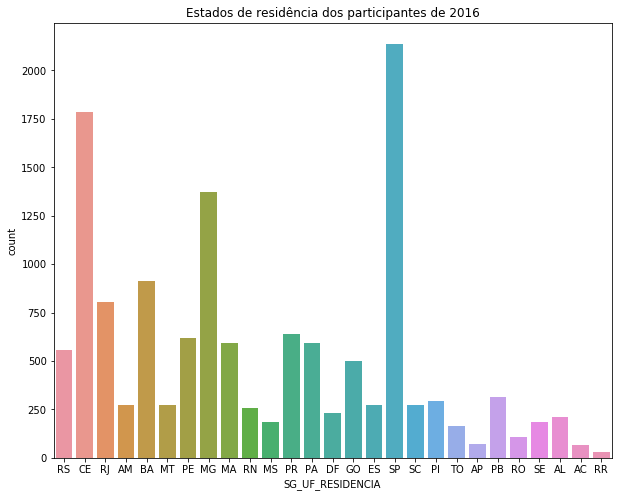

In [8]:
plt.rc('figure', figsize = (10,8))
sns.countplot(df['SG_UF_RESIDENCIA'])
plt.title('Estados de residência dos participantes de 2016')

Text(0.5, 1.0, 'Gênero dos participantes de 2016')

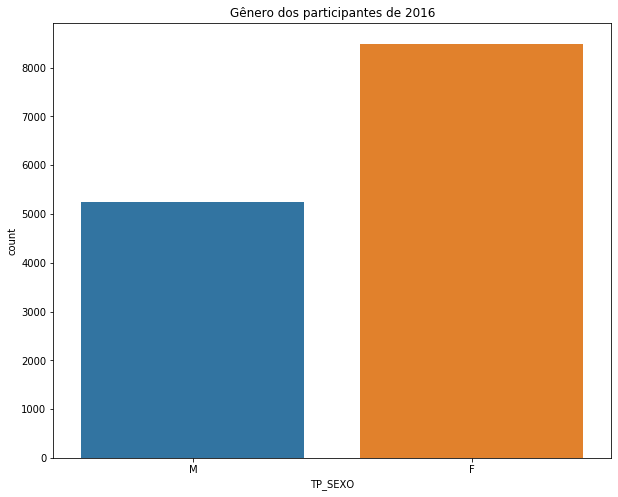

In [9]:
sns.countplot(df['TP_SEXO'])
plt.title('Gênero dos participantes de 2016')

Text(0.5, 1.0, 'Tipo de escola que os participantes de 2016')

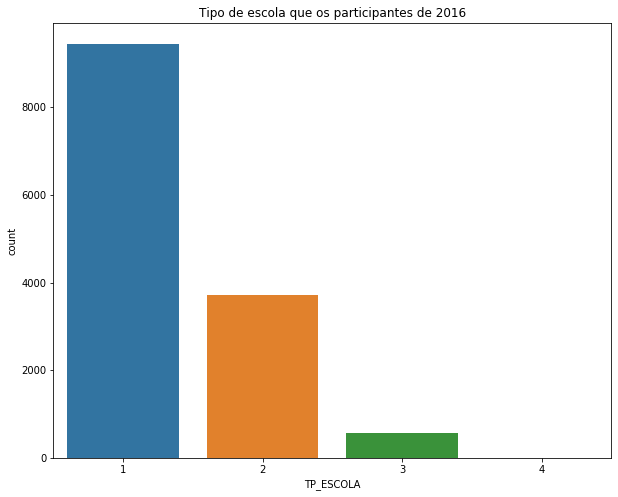

In [10]:
sns.countplot(df['TP_ESCOLA'])
plt.title('Tipo de escola que os participantes de 2016')

Text(0.5, 1.0, 'Gênero dos participantes de 2016')

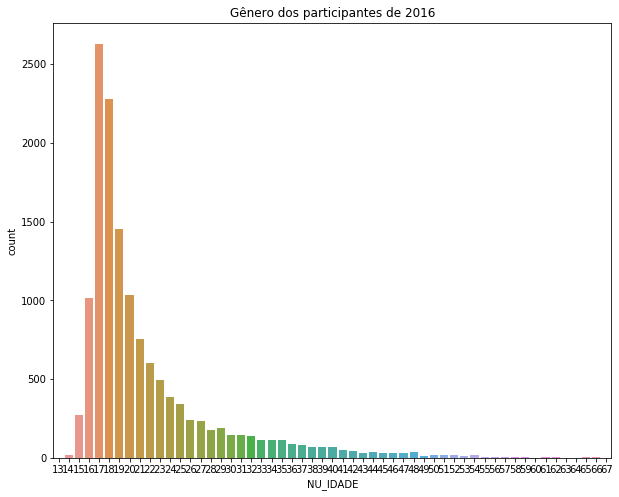

In [11]:
sns.countplot(df['NU_IDADE'])
plt.title('Gênero dos participantes de 2016')

Podemos notar através desses gráficos que grande parte dos participantes do ENEM em 2016:
* São do gênero feminino,
* Grande parte dos participantes tem em média 17 e 18 anos
* Temos muitos participantes que não responderam a pesquisa referente a escola, e alguns vieram de escolas públicas
* Temos mais participantes de SP,CE e MG

Quantas pessoas fizeram a prova de matemática?

In [12]:
df.shape[0]

13730

In [13]:
pessoas_mt = df['TP_PRESENCA_MT'].value_counts()
pessoas_mt

1    10133
0     3592
2        5
Name: TP_PRESENCA_MT, dtype: int64

In [14]:
porcent_pessoas_mt = (pessoas_mt[1]*100)/df.shape[0]
print('Das pessoas que fizeram a prova do enem somente {}% fizeram a prova de matemática'.format(porcent_pessoas_mt))

Das pessoas que fizeram a prova do enem somente 73.80189366351055% fizeram a prova de matemática


In [15]:
df[df['NU_NOTA_MT'].isnull()].shape[0]

3597

In [16]:
df[df['NU_NOTA_MT']==0].shape[0]

10

3597 pessoas não fizeram a prova de matemática e 10 pessoas zeraram a prova

Text(0.5, 1.0, 'Distribuição das notas de matemática em 2016')

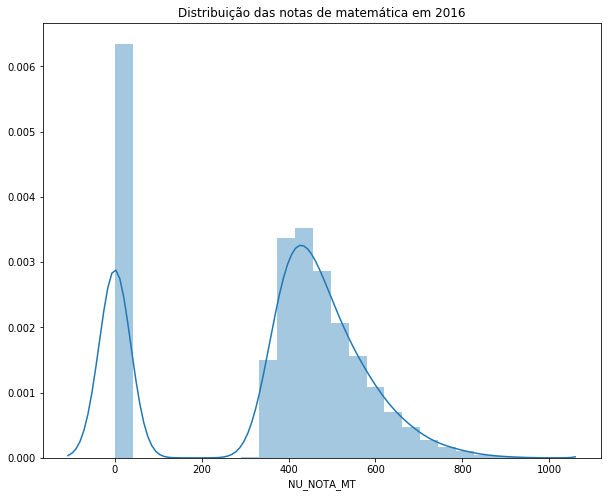

In [17]:
mat_min = df['NU_NOTA_MT'].min()
df.update(df['NU_NOTA_MT'].fillna(mat_min))
sns.distplot(df['NU_NOTA_MT'])
plt.title('Distribuição das notas de matemática em 2016')


Com esse gráfico conseguimos chegar em algumas conclusões:
* Grande parte das notas de matemática estão concentradas entre 400 e 500 pontos. 
* Grande parte dos dados estão distribuídos bem próximos a média das notas que é 482
* A inclinação do gráfico está um pouco à esquerda.

#### Quem tirou a maior nota em matemática?

In [18]:
df['NU_NOTA_MT'].max()

952.0

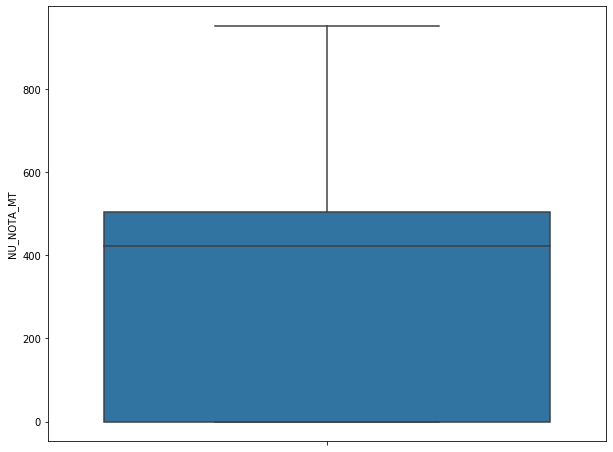

In [19]:
ax = sns.boxplot(x=df.NU_NOTA_MT,orient='v')

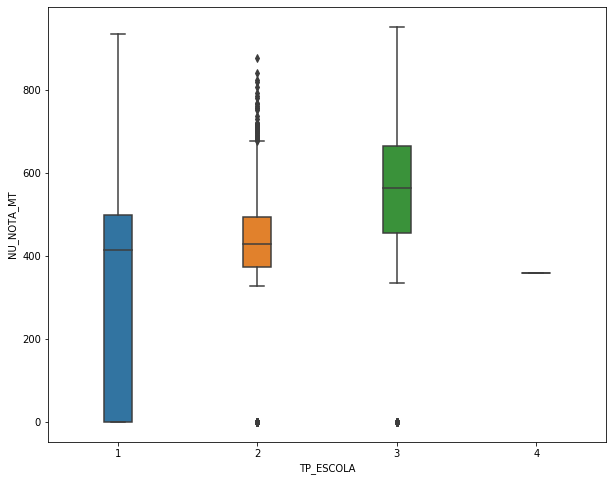

In [20]:
ax = sns.boxplot(x=df.TP_ESCOLA, y=df.NU_NOTA_MT,orient='v',width=0.2)


1- Não respoderam
2- Alunos de escola pública
3- Alunos de escolas particulares
4- Alunos de escolas do exterior

Podemos concluir que alunos de escolas particulares costumam tirar as maiores notas em nota de matemática

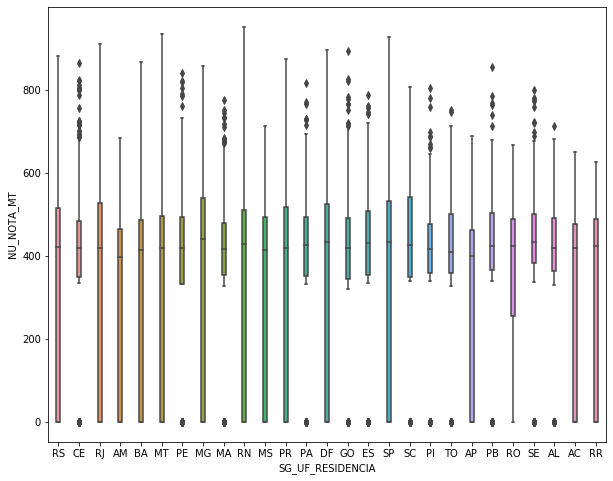

In [21]:
ax = sns.boxplot(x=df.SG_UF_RESIDENCIA, y=df.NU_NOTA_MT,orient='v',width=0.2)


Os estados do RS, RJ, AM, BA, MT, RN, MS, PR, DF,SP, AP, AC, RR e RO tem muitos alunos que tiraram notas em matemática abaixo do valor médio/ mediana.

Já nos outros estados, grande parte dos alunos tiram notas bem próximas do valor médio/ mediana.

Em SC, TO, PB, AL e SE grande parte dos participantes tiraram notas acima do valor médio/ mediana.


### Será que o desempenho de um aluno em uma prova interfera no desempanho da outra?

Text(0.5, 1.05, 'Disperção entre as variaveis')

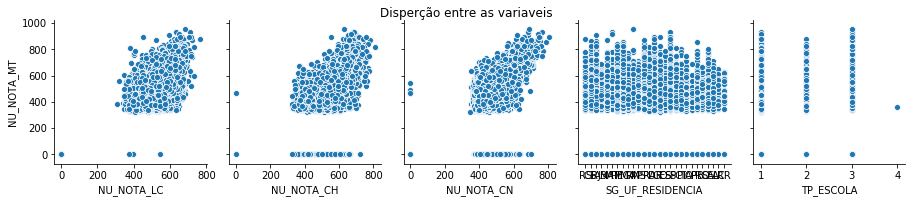

In [22]:
ax = sns.pairplot(df,y_vars='NU_NOTA_MT',x_vars=['NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_CN','SG_UF_RESIDENCIA','TP_ESCOLA'])
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

Questionamentos:
    1. Temos uma relação forte linear da nota de matemática com a nota de linguagens e códigos? E a prova de matemática com prova de ciências da natureza? 
    
    

### A escolaridade pode interferir na correlação das notas?

In [23]:
# ax= sns.lmplot(x="NU_NOTA_MT", y="NU_NOTA_CN", data=df, col='TP_ESCOLA')
# ax.fig.suptitle('Reta de Regressao - Nota de Matemática X Nota de ciências da natureza', fontsize=16, y=1.02)
# ax.set_xlabels("Nota de matemática", fontsize=14)
# ax.set_ylabels("Nota de ciências da natureza", fontsize=14)
# ax

In [24]:
# ax= sns.lmplot(x="NU_NOTA_MT", y="NU_NOTA_CH", data=df, col='TP_ESCOLA')
# ax.fig.suptitle('Reta de Regressao - Nota de Matemática X Nota de ciências humanas', fontsize=16, y=1.02)
# ax.set_xlabels("Nota de matemática", fontsize=14)
# ax.set_ylabels("Nota de ciências humanas", fontsize=14)
# ax

In [25]:
# ax= sns.lmplot(x="NU_NOTA_MT", y="NU_NOTA_LC", data=df, col='TP_ESCOLA')
# ax.fig.suptitle('Reta de Regressao - Nota de Matemática X Nota de Linguagens', fontsize=16, y=1.02)
# ax.set_xlabels("Nota de matemática", fontsize=14)
# ax.set_ylabels("Nota de linguagens", fontsize=14)
# ax

Conclusão:
    1. O fator do tipo da escola frequentada poder influenciar na correlação das notas, onde a correlação fica mais forte positivamente e mais visível quando os alunos são de escola privadas.
    

Tipos de prova de matemática:

In [26]:
df['CO_PROVA_MT'].unique()

array(['97caab1e1533dba217deb7ef41490f52e459ab01',
       '2d22ac1d42e6187f09ee6c578df187a760123ccf',
       '81d0ee00ef42a7c23eb04496458c03d4c5b9c31a',
       '767a32545304ed293242d528f54d4edb1369f910',
       '577f8968d95046f5eb5cc158608e12fa9ba34c85',
       '0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e',
       '0e0082361eaceb6418bb17305a2b7912650b4783',
       '6d6961694e839531aec2d35bbd8552b55394a0d7',
       '73c5c86eef8f70263e4c5708d153cca123f93378'], dtype=object)

In [27]:
# df_new = df[['NU_NOTA_MT','TP_ESCOLA','TP_PRESENCA_CN', 'TX_GABARITO_MT','TX_RESPOSTAS_MT','NU_IDADE','TP_ST_CONCLUSAO'
#              ,'TP_ANO_CONCLUIU', 'TP_ENSINO','IN_TREINEIRO','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC'
#              ,'IN_SEM_RECURSO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_REDACAO'
#              ,'Q035','Q036','Q037','Q038','Q040','Q041']]
df_new = df[['TP_ESCOLA','TP_PRESENCA_CH','TP_PRESENCA_CN','TP_PRESENCA_LC','NU_NOTA_MT','NU_IDADE','TP_ST_CONCLUSAO'
             ,'TP_ANO_CONCLUIU', 'TP_ENSINO','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_STATUS_REDACAO','NU_NOTA_REDACAO','TP_PRESENCA_MT']]
df_new.head()

,TP_ESCOLA,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,NU_NOTA_MT,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_STATUS_REDACAO,NU_NOTA_REDACAO,TP_PRESENCA_MT
0,1,1,1,1,399.4,24,1,4,NaN,0,436.3,495.4,581.2,1.0,520.0,1
1,2,1,1,1,459.8,17,2,0,1.0,0,474.5,544.1,599.0,1.0,580.0,1
2,1,0,0,0,0.0,21,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0
3,1,0,0,0,0.0,25,1,9,NaN,0,NaN,NaN,NaN,NaN,NaN,0
4,1,0,0,0,0.0,28,1,4,NaN,0,NaN,NaN,NaN,NaN,NaN,0


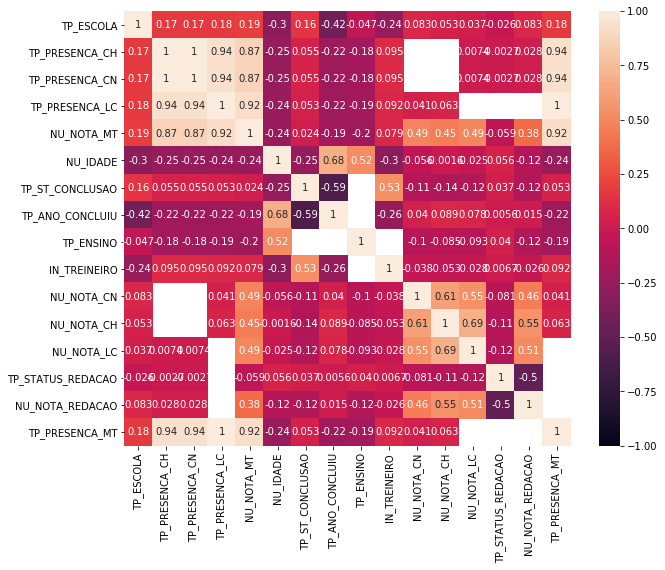

In [28]:
sns.heatmap(df_new.corr(),annot=True,vmin=-1,vmax=1)

In [29]:
df_new.select_dtypes(['object']).columns

Index([], dtype='object')

In [30]:
df_new = df_new.fillna(value=0)
df_test = df_test.fillna(value=0)
df_new.isnull().values.any()


False

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TP_ESCOLA          13730 non-null  int64  
 1   TP_PRESENCA_CH     13730 non-null  int64  
 2   TP_PRESENCA_CN     13730 non-null  int64  
 3   TP_PRESENCA_LC     13730 non-null  int64  
 4   NU_NOTA_MT         13730 non-null  float64
 5   NU_IDADE           13730 non-null  int64  
 6   TP_ST_CONCLUSAO    13730 non-null  int64  
 7   TP_ANO_CONCLUIU    13730 non-null  int64  
 8   TP_ENSINO          13730 non-null  float64
 9   IN_TREINEIRO       13730 non-null  int64  
 10  NU_NOTA_CN         13730 non-null  float64
 11  NU_NOTA_CH         13730 non-null  float64
 12  NU_NOTA_LC         13730 non-null  float64
 13  TP_STATUS_REDACAO  13730 non-null  float64
 14  NU_NOTA_REDACAO    13730 non-null  float64
 15  TP_PRESENCA_MT     13730 non-null  int64  
dtypes: float64(7), int64(9

### Criando o modelo de Regressão linear multipla

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [33]:
modelo = LinearRegression()

In [55]:
y = df_new['NU_NOTA_MT']

X = df_new[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','TP_PRESENCA_MT']]



In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [57]:
X_train.shape

(9611, 5)

In [58]:
X_test.shape

(4119, 5)

In [59]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
print("R quadrado = {}".format(modelo.score(X_train,y_train)))

R quadrado = 0.9032528913166321


In [61]:
lm = modelo.predict(X_test)

In [62]:
print("R quadrado de teste = {}".format(metrics.r2_score(y_test,lm).round(2)))

R quadrado de teste = 0.91


#### Analisando os valores de treino

In [63]:
import numpy as np
index = ['INTERCEPT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','TP_PRESENCA_MT']
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_), index=index,columns=['Parametros'])



,Parametros
INTERCEPT,-5.255134
NU_NOTA_CN,0.335875
NU_NOTA_CH,-0.135485
NU_NOTA_LC,0.560740
NU_NOTA_REDACAO,0.083826
TP_PRESENCA_MT,66.414155


Os 3 parâmetros que mais pesam na decisão do modelo é: A presença do aluno na prova (TP_PRESENCA_MT)
    
    
    

#### Analisando a predição do modelo

In [65]:
y_predict_train = modelo.predict(X_train)

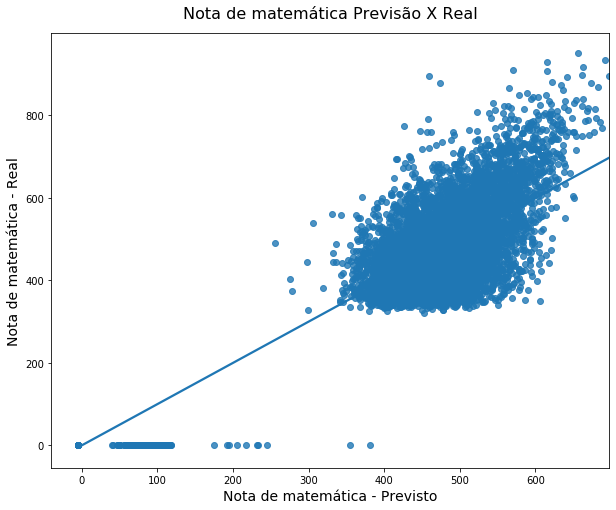

In [66]:
ax = sns.regplot(x = y_predict_train,y=y_train)
ax.set_title('Nota de matemática Previsão X Real', fontsize=16, y=1.02)
ax.set_xlabel("Nota de matemática - Previsto", fontsize=14)
ax.set_ylabel("Nota de matemática - Real", fontsize=14)
ax

Podemos notar que novamente a presença dos valores outliers no gráfico, que são as pessoas que faltaram ou zeraram na prova.

#### Fazendo o teste do modelo

In [67]:
y_predict = modelo.predict(X_test)

In [68]:
print("Modelo de teste com todos os atributos")
print("R quadrado = {}".format(metrics.r2_score(y_test,y_predict).round(2)))

Modelo de teste com todos os atributos
R quadrado = 0.91


In [69]:
EQM = metrics.mean_squared_error(y_test,y_predict)
EQM

5012.561231529389

Precisamos diminuir o valor de EQM, para que nosso modelo fique mais preciso

#### Verificando os resíduos

Text(0, 0.5, 'Resíduos')

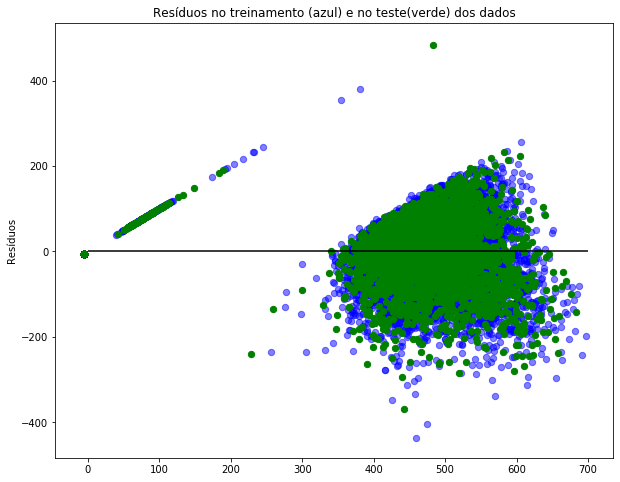

In [49]:
residuo_train = y_predict_train - y_train
residuo_test = y_predict - y_test
plt.scatter(y_predict_train, residuo_train, c='b',s=40,alpha=0.5)
plt.scatter(y_predict,residuo_test, c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=700)

plt.title('Resíduos no treinamento (azul) e no teste(verde) dos dados')
plt.ylabel('Resíduos')




#### Modelo 2

In [54]:
modelo2 = LinearRegression()

In [70]:
y = df_new['NU_NOTA_MT']

X = df_new[['TP_ESCOLA','TP_PRESENCA_CH','TP_PRESENCA_CN','TP_PRESENCA_LC','NU_IDADE','TP_ST_CONCLUSAO'
             ,'TP_ANO_CONCLUIU', 'TP_ENSINO','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','TP_STATUS_REDACAO','NU_NOTA_REDACAO','TP_PRESENCA_MT']]



In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [72]:
X_train.shape

(9611, 15)

In [73]:
modelo2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
print("R quadrado = {}".format(modelo2.score(X_train,y_train)))

R quadrado = 0.9095752003742819


In [75]:
predict2 = modelo2.predict(X_test)
print("R quadrado de teste = {}".format(metrics.r2_score(y_test,predict2).round(2)))

R quadrado de teste = 0.91


In [76]:
EQM = metrics.mean_squared_error(y_test,predict2)
EQM

4615.262114741276

## Testando o modelo com os valores de test.csv

In [53]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [52]:
test = df_test[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','TP_PRESENCA_MT']]
math_predict = modelo.predict(test)
df_test['NU_NOTA_MT'] = math_predict


KeyError: "['TP_PRESENCA_MT'] not in index"

In [ ]:
math_predict

In [ ]:
df_test[['NU_INSCRICAO','NU_NOTA_MT']].to_csv('answer.csv', index=False)